In [4]:
import numpy as np
import random as rd

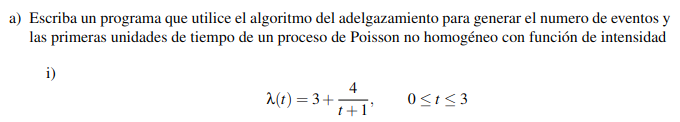

In [5]:
def Poisson_no_homogeneo_adelgazamiento(T, lamda_t, lamda):
    'Devuelve el n ́umero de eventos NT y los tiempos en Eventos'
    'lamda_t(t): intensidad, lamda_t(t)<= lamda(es una cota)'
    NT = 0
    Eventos = []
    U = 1 - rd.random()
    t = -np.log(U) / lamda
    while t <= T:
        V = rd.random()
        if V < lamda_t(t) / lamda:
            NT += 1
            Eventos.append(t)
        t += -np.log(1-rd.random()) / lamda
    return NT, Eventos

In [6]:
def lamda_t_1(t):
    # para 0 <= t <= 3
    return 3 + (4/(t+1))

lamda_1 = lamda_t_1(3)
T_1 = 1.5
NT, Eventos = Poisson_no_homogeneo_adelgazamiento(T_1, lamda_t_1, lamda_1)

print('T = 1.5')
print('NT =', NT)
for i in range(NT):
    print('Evento', i+1, 'en t =', Eventos[i])

T = 1.5
NT = 3
Evento 1 en t = 0.3305711927366824
Evento 2 en t = 0.6028995226094369
Evento 3 en t = 0.6738546582475703


Podemos mejorar el algoritmo separando en 3 intervalos. 
[0,1) [1,2) [2,3), para ello debo encontrar una cota de lambda adecuada para cada intervalo, en ese caso tomare el maxio de la funcion lamda_t en cada extremo.

Para ello defino una generalizacion del algoritmo que tomara el T, el conjunto de subintervalos y los correspondientes lambdas. 

In [12]:
def Poisson_mejorado(T, interv, lamdas, lamda_t):
    j = 0 # recorre intervalos
    U = 1 - rd.random()
    t = -np.log(U) / lamdas[j]
    NT = 0
    Eventos = []

    while t <= T:
        if t<=interv[j]:
            V = rd.random()
            if V < lamda_t(t) / lamdas[j]:
                NT += 1
                Eventos.append(t)
            t += -np.log(1-rd.random()) / lamdas[j]
        else: # t > interv[j]
            t = interv[j] + (t - interv[j]) * lamdas[j] / lamdas[j+1]
            j += 1

    return NT, Eventos


In [20]:
interv = [1, 2, 3]
lambdas = [lamda_t_1(x) for x in interv]

T = 1.5

NT, Eventos = Poisson_mejorado(T, interv, lambdas, lamda_t_1)

print(f'T = {T} ')
print('NT =', NT)
for i in range(NT):
    print('Evento', i+1, 'en t =', Eventos[i])


T = 1.5 
NT = 8
Evento 1 en t = 0.22666179396999744
Evento 2 en t = 0.25332700002223524
Evento 3 en t = 0.3527923556406486
Evento 4 en t = 0.8978015695723404
Evento 5 en t = 0.898243125699615
Evento 6 en t = 1.262680227728886
Evento 7 en t = 1.3615758950018502
Evento 8 en t = 1.3650340759699455
